In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
"""Data"""

homeL = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months'
home  = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products'

Average = xr.open_dataset(homeL + '/LS3MIP_avg_200101_201212.nc' , engine = 'netcdf4')
CLASS_monthly_sg = xr.open_dataset(home + '/CLASS/CLASS_v1-1_2003-2009_Same_grid.nc')
DOLCE_v2_1_monthly_sg = xr.open_dataset(home + '/DOLCE_v2-1/DOLCE_v2-1_2001-2012_Same_grid.nc')
DOLCE_v3_monthly_sg = xr.open_dataset(home + '/DOLCE_v3/DOLCE_v3_2001-2012_Same_grid.nc')
FRM_monthly_sg = xr.open_dataset(home + '/FLUXCOM_RS_METEO_ensemble/FLUXCOM_RS_METEO_monthly_2001-2012_Same_grid.nc')
FBP_monthly_sg = xr.open_dataset(home + '/FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_Same_grid.nc')
LFE_monthly_sg = xr.open_dataset(home + '/LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc')

In [3]:
"""Parameters"""

L_60 = 30
L_eq = 90

"""Converting to mm/d"""
t_day = 86400 #seconds
factor = t_day

#Average

"""Removing Antarctica"""

Average_monthly_weighted_Ant = Average.evspsbl[: , L_60:  , :] * factor

"""-60 until 0 degrees"""

Average_monthly_weighted_SH  = Average.evspsbl[: , L_60:L_eq , :] * factor

#CLASS

"""Converting to mm/d"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

CLASS_monthly_weighted_Ant = CLASS_monthly_sg.hfls[: , L_60: , :] * factor

"""-60 until 0 degrees"""

CLASS_monthly_weighted_SH  = CLASS_monthly_sg.hfls[: , L_60:L_eq  , :] * factor

#DOLCE v2

"""Removing Antarctica"""

DOLCE_v2_1_monthly_weighted_Ant = DOLCE_v2_1_monthly_sg.hfls[: , L_60: , :] * factor

"""-60 until 0 degrees"""

DOLCE_v2_1_monthly_weighted_SH  = DOLCE_v2_1_monthly_sg.hfls[: , L_60:L_eq , :] * factor

#DOLCE v3

"""Removing Antarctica"""

DOLCE_v3_monthly_weighted_Ant = DOLCE_v3_monthly_sg.hfls[: , L_60: , :] * factor

"""-60 until 0 degrees"""

DOLCE_v3_monthly_weighted_SH  = DOLCE_v3_monthly_sg.hfls[: , L_60:L_eq , :] * factor

#FRM

"""Converting to mm/d"""

labda = 2.45 * 10**6 #J kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (625 / 54)*(t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

FRM_monthly_weighted_Ant = FRM_monthly_sg.LE[: , L_60: , :] * factor

"""-60 until 0 degrees"""

FRM_monthly_weighted_SH  = FRM_monthly_sg.LE[: , L_60:L_eq , :] * factor

#FBP

"""Removing Antarctica"""

FBP_monthly_weighted_Ant = FBP_monthly_sg.Evaporation[: , L_60: , :]

"""-60 until 0 degrees"""

FBP_monthly_weighted_SH  = FBP_monthly_sg.Evaporation[: , L_60:L_eq , :]

#LFE

"""Removing Antarctica"""

LFE_monthly_weighted_Ant = LFE_monthly_sg.ET_mean[: , L_60: , :]

"""-60 until 0 degrees"""

LFE_monthly_weighted_SH  = LFE_monthly_sg.ET_mean[: , L_60:L_eq  , :]

-----------------------------------------------------------------------------------Januari----2003--------------------------------------------------------------------------------


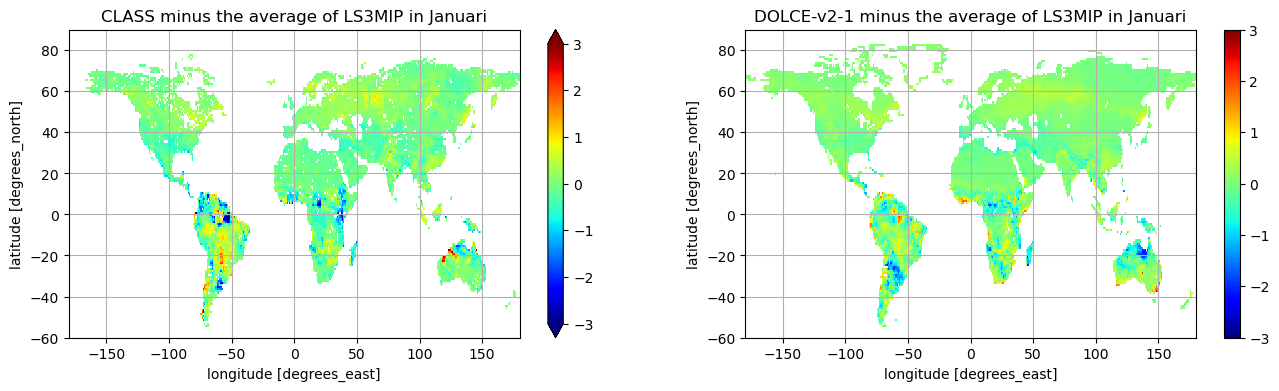

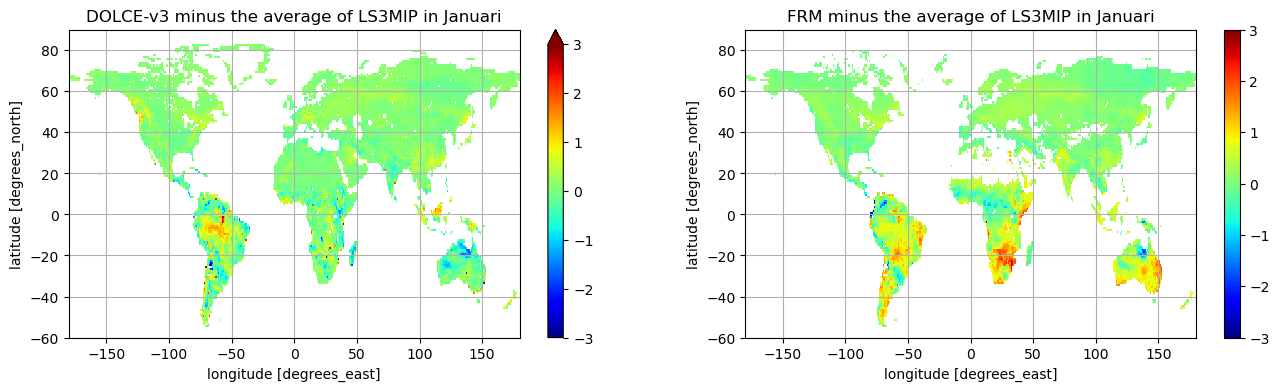

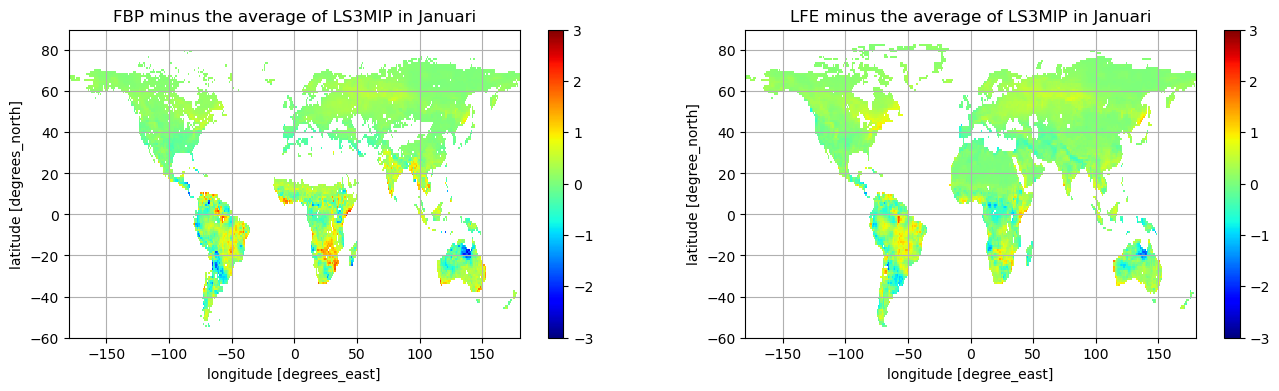

In [4]:
i = 0
lag = 24
label = ['CLASS' , 'DOLCE-v2-1' , 'DOLCE-v3' , 'FRM' , 'FBP' , 'LFE']
months = ['Januari' , 'Februari' , 'March' , 'April' , 'May' , 'June' , 'July' , 'Augustus' , 'September' , 'October' , 'November' , 'December']

print(f'-----------------------------------------------------------------------------------{months[i]}----2003--------------------------------------------------------------------------------')

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = CLASS_monthly_weighted_Ant[i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[0]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[1]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[2]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = FRM_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[3]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = FBP_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[4]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = LFE_monthly_weighted_Ant[204 - 36 + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[5]} minus the average of LS3MIP in {months[i]}')
plt.grid()

-----------------------------------------------------------------------------------July----2003--------------------------------------------------------------------------------


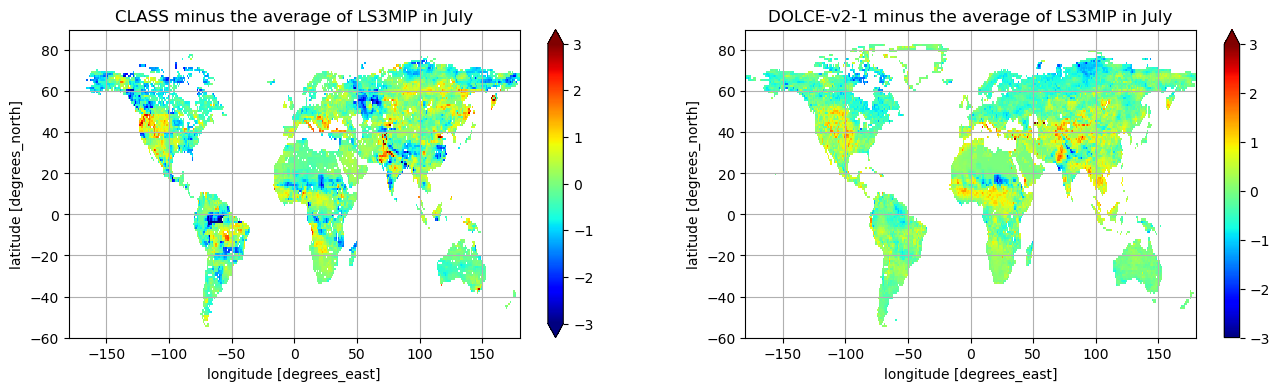

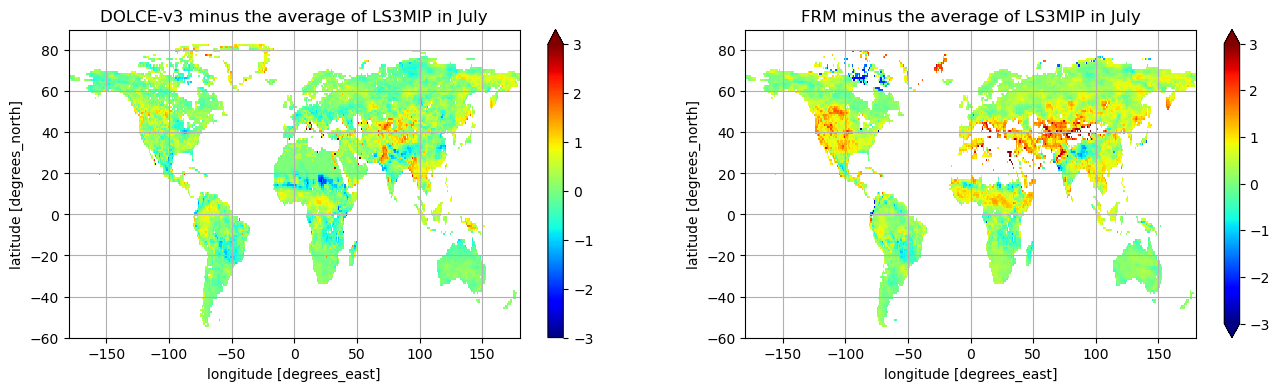

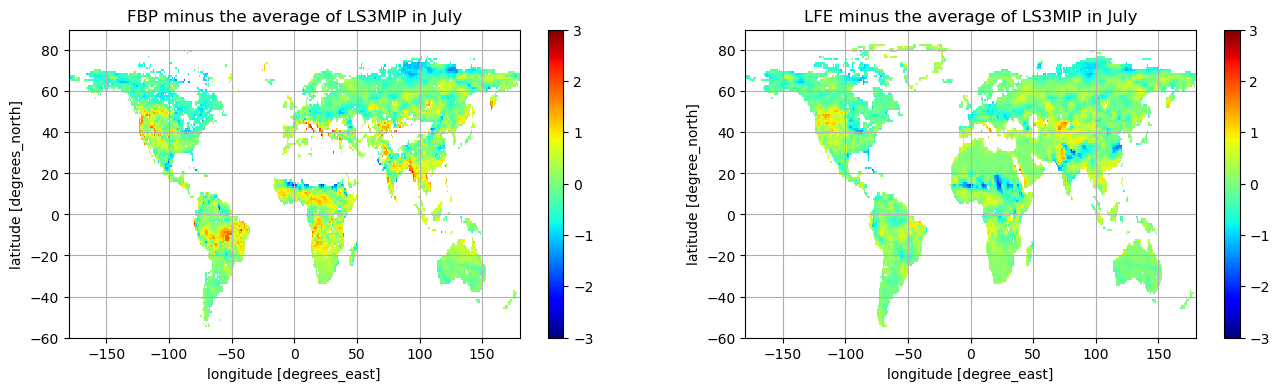

In [5]:
i = 6

print(f'-----------------------------------------------------------------------------------{months[i]}----2003--------------------------------------------------------------------------------')

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = CLASS_monthly_weighted_Ant[i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[0]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[1]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[2]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = FRM_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[3]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = FBP_monthly_weighted_Ant[lag + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[4]} minus the average of LS3MIP in {months[i]}')
plt.grid()

plt.subplot(122)
c = LFE_monthly_weighted_Ant[204 - 36 + i , : , :] - Average_monthly_weighted_Ant[lag + i , : , :]
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[5]} minus the average of LS3MIP in {months[i]}')
plt.grid()

------------------------------------------------------------------------------------Januari----2003--------------------------------------------------------------------------------


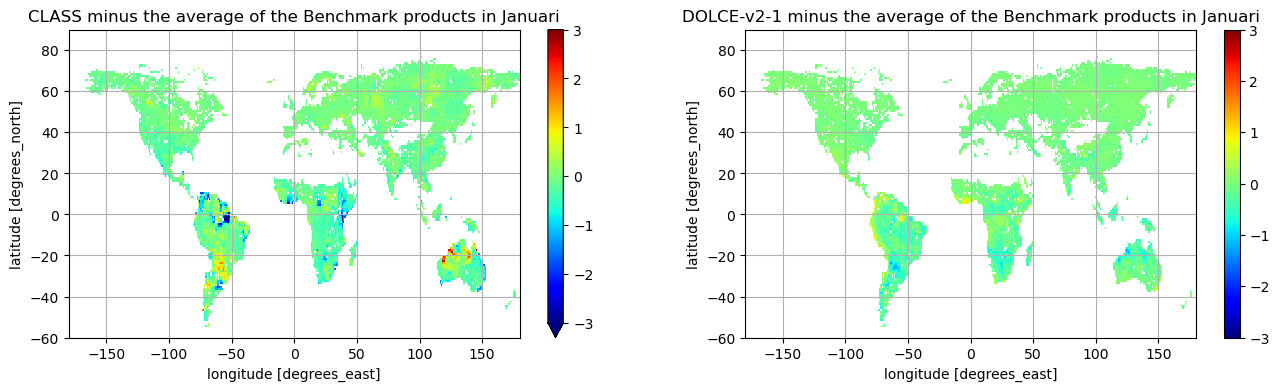

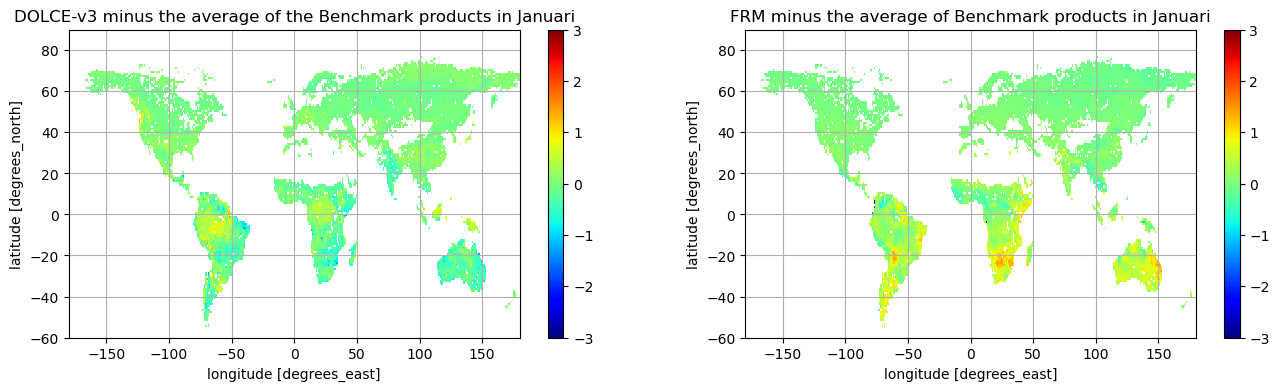

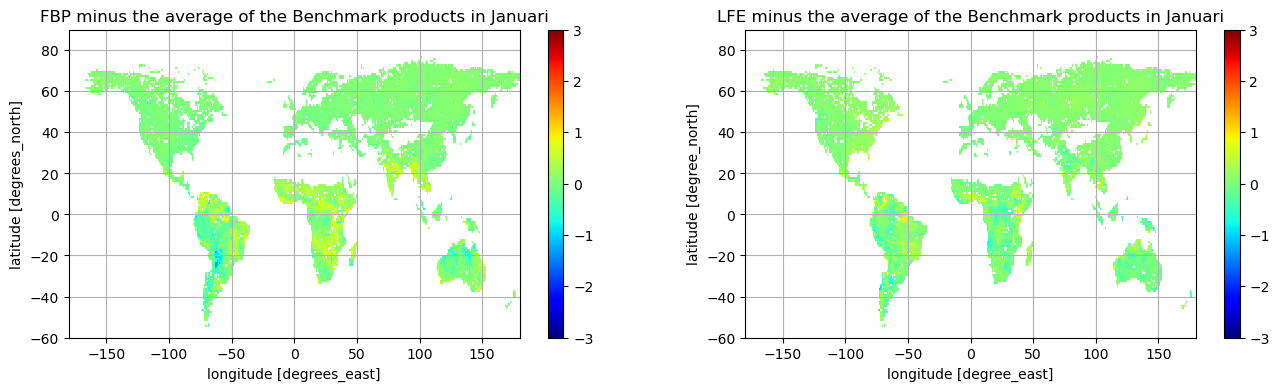

In [6]:
i = 6

July = CLASS_monthly_weighted_Ant[i , : , :] + DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] + DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] + FRM_monthly_weighted_Ant[lag + i , : , :] + FBP_monthly_weighted_Ant[lag + i , : , :] + LFE_monthly_weighted_Ant[204 - 36 + i , : , :]
Average_Benchmark_Jul = July/6

i = 0


Jan = CLASS_monthly_weighted_Ant[i , : , :] + DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] + DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] + FRM_monthly_weighted_Ant[lag + i , : , :] + FBP_monthly_weighted_Ant[lag + i , : , :] + LFE_monthly_weighted_Ant[204 - 36 + i , : , :]
Average_Benchmark_Jan = Jan/6


print(f'------------------------------------------------------------------------------------{months[i]}----2003--------------------------------------------------------------------------------')

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = CLASS_monthly_weighted_Ant[i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[0]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[1]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[2]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = FRM_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[3]} minus the average of Benchmark products in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = FBP_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[4]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = LFE_monthly_weighted_Ant[204 - 36 + i , : , :] - Average_Benchmark_Jan
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[5]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

------------------------------------------------------------------------------------July----2003--------------------------------------------------------------------------------


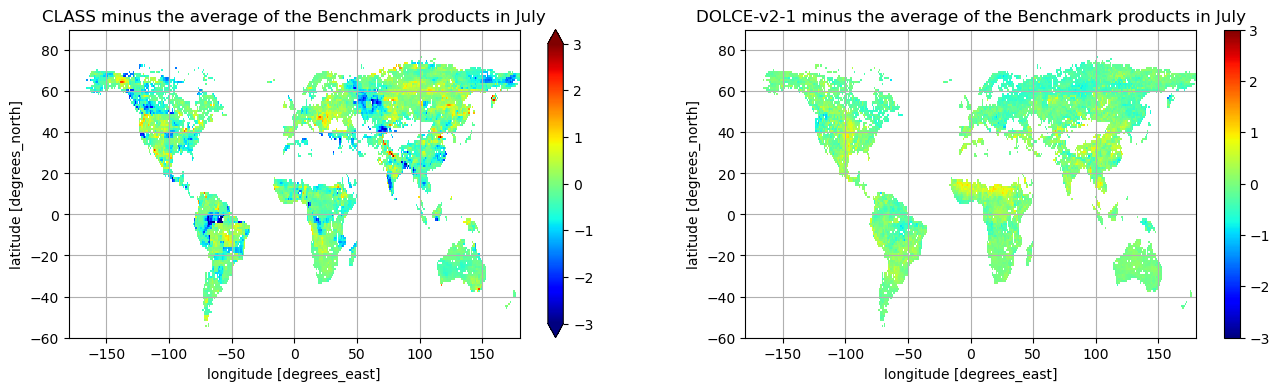

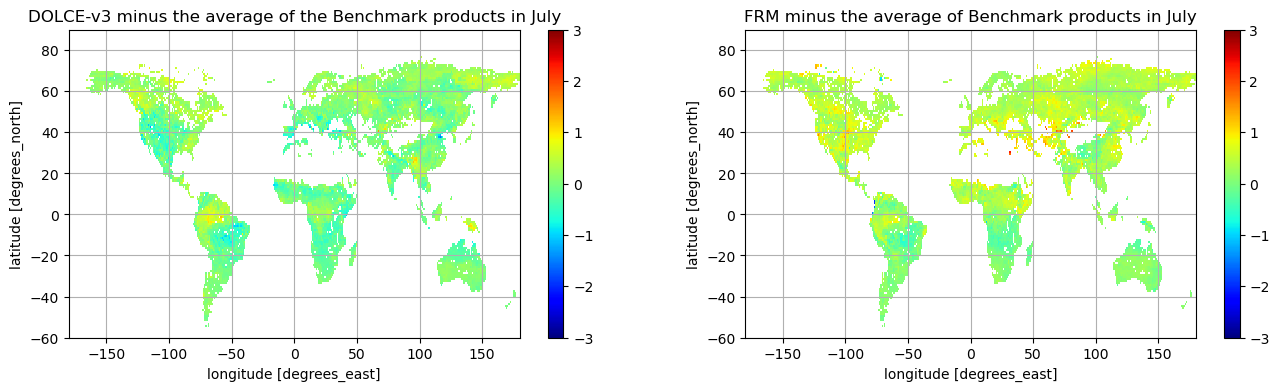

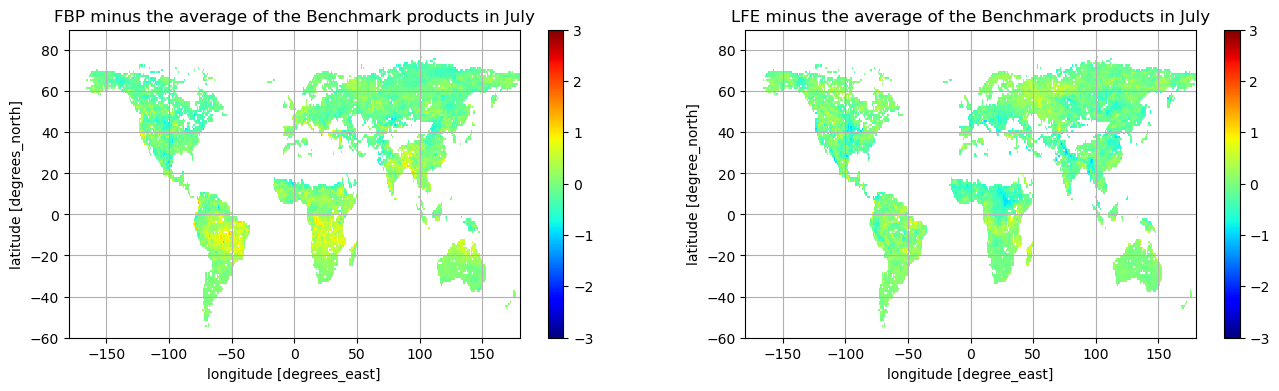

In [7]:
i = 6

print(f'------------------------------------------------------------------------------------{months[i]}----2003--------------------------------------------------------------------------------')

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = CLASS_monthly_weighted_Ant[i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[0]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = DOLCE_v2_1_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[1]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = DOLCE_v3_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[2]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = FRM_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[3]} minus the average of Benchmark products in {months[i]}')
plt.grid()

plt.figure(figsize = (16 , 4))

plt.subplot(121)
c = FBP_monthly_weighted_Ant[lag + i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[4]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

plt.subplot(122)
c = LFE_monthly_weighted_Ant[204 - 36 + i , : , :] - Average_Benchmark_Jul
c.plot(cmap = 'jet' , vmin = -3 , vmax =3)
plt.title(f'{label[5]} minus the average of the Benchmark products in {months[i]}')
plt.grid()

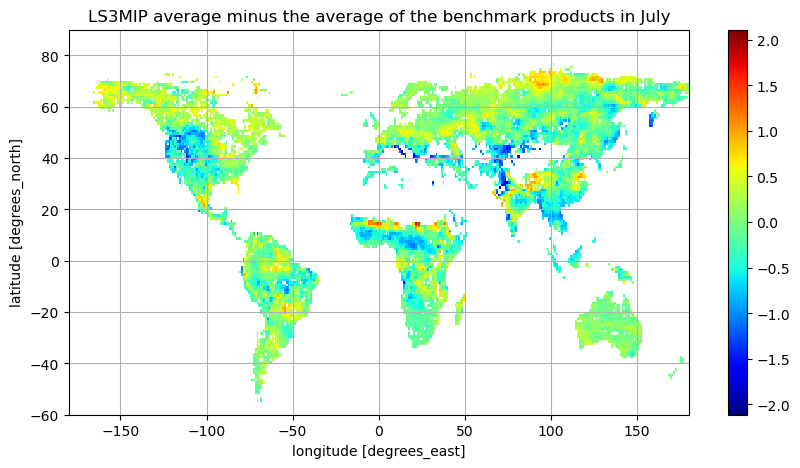

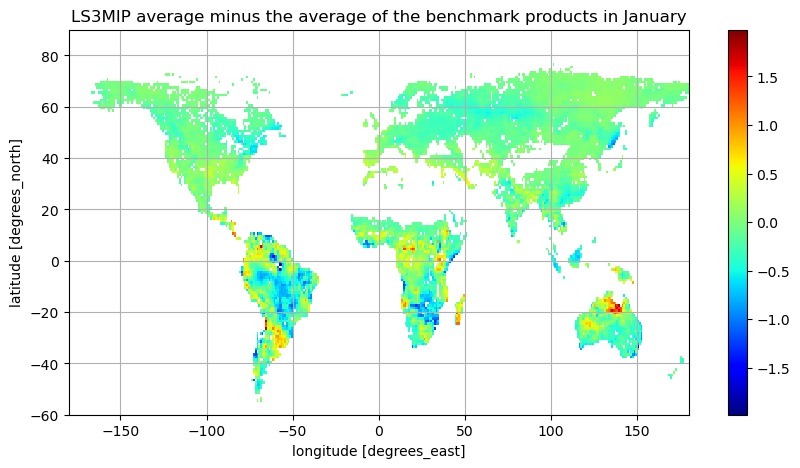

In [9]:
plt.figure(figsize = (10 , 5))
t = Average_monthly_weighted_Ant[lag + 6 , : , :] - Average_Benchmark_Jul

t.plot(cmap = 'jet')
plt.title(f'LS3MIP average minus the average of the benchmark products in July')
plt.grid();

plt.figure(figsize = (10 , 5))

t2 = Average_monthly_weighted_Ant[lag + 0 , : , :] - Average_Benchmark_Jan
t2.plot(cmap = 'jet')
plt.title(f'LS3MIP average minus the average of the benchmark products in January')
plt.grid();